In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.activation import sigmoid,softmax,tanh,relu,linear
from allison.utils.metrics import r2_score
from allison.utils.functions.loss import mean_squared_error
from allison.optimizers.sgd import SGD,SGDMomentum

Dataset

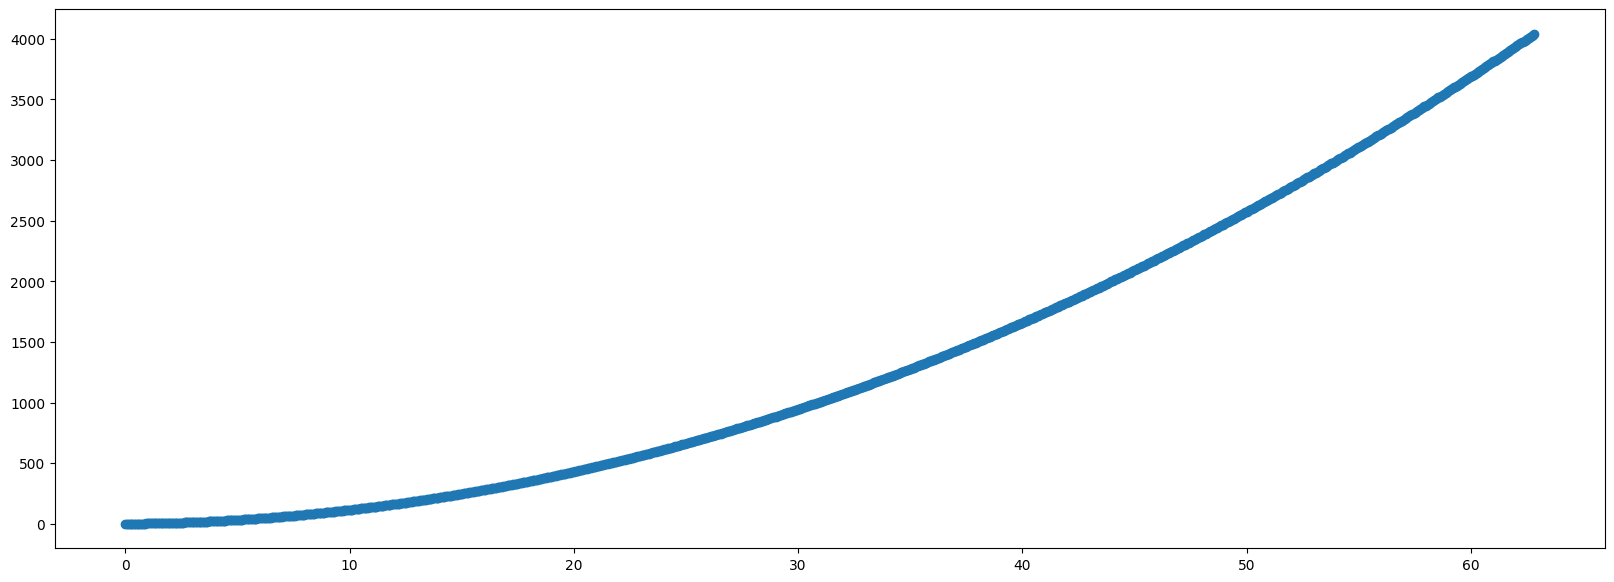

In [127]:
points = 1000

x1 = np.linspace(0,20*np.pi,points)
x2 = np.linspace(0,20*np.pi,points)

y =  x1**2 + 1.5*x2

plt.figure(figsize=(20, 7))
plt.scatter(x2, y)

# Preprocess

In [128]:
# # %%
# # Normalización
# X_np = np.stack([x1, x2], axis=1)
# X_mean, X_std = X_np.mean(axis=0), X_np.std(axis=0)
# X_norm = (X_np - X_mean) / X_std

# y_mean, y_std = y.mean(), y.std()
# y_norm = (y - y_mean) / y_std
# y_norm = y_norm.reshape(-1,1)

X_norm = np.stack([x1,x2],axis=1)
y_norm = y

# Train

In [129]:
model = NeuralNetwork(mean_squared_error,r2_score)
model.add_layer(LayerDense(2,64,relu))
model.add_layer(LayerDense(64,32,relu))
model.add_layer(LayerDense(32,1,linear))
model.summary()

Layer:1, neurons:64, input:(n,2), weights:(2,64), output:(n,64), activation:relu 

Layer:2, neurons:32, input:(n,64), weights:(64,32), output:(n,32), activation:relu 

Layer:3, neurons:1, input:(n,32), weights:(32,1), output:(n,1), activation:linear 

Total -> Layers:3, neurons:97, weights:2208, bias:97 params:2305 

Loss function: mean_squared_error 

Metric: r2_score 



In [130]:
# optimizer = SGD(learning_rate=0.000000000001)
optimizer = SGDMomentum(learning_rate=1e-13,momentum=0.9)

In [140]:
steps = 10
iters = 100

r2_train = 0
r2_test = 0

for step in range(1,steps+1):

    r2_train = model.evaluate(X_norm,y_norm)
    # r2_test = model.evaluate(X_test,Y_test)
    print(f"Step: {step:3d} R2_train: {100*r2_train:.14f}%")

    # if r2_train > 0.85 :
    #     break
    
    for i in range(iters):
        output = model.forward(X_norm)
        model.backward(output,y_norm,X_norm)
        optimizer.update(model)
    

Step:   1 R2_train: 84.06284597793791%
Step:   2 R2_train: 84.06295364897292%
Step:   3 R2_train: 84.06304474546546%
Step:   4 R2_train: 84.06312181902173%
Step:   5 R2_train: 84.06318702838556%
Step:   6 R2_train: 84.06324219994073%
Step:   7 R2_train: 84.06328887889070%
Step:   8 R2_train: 84.06332837255502%
Step:   9 R2_train: 84.06336178699625%
Step:  10 R2_train: 84.06339005800690%


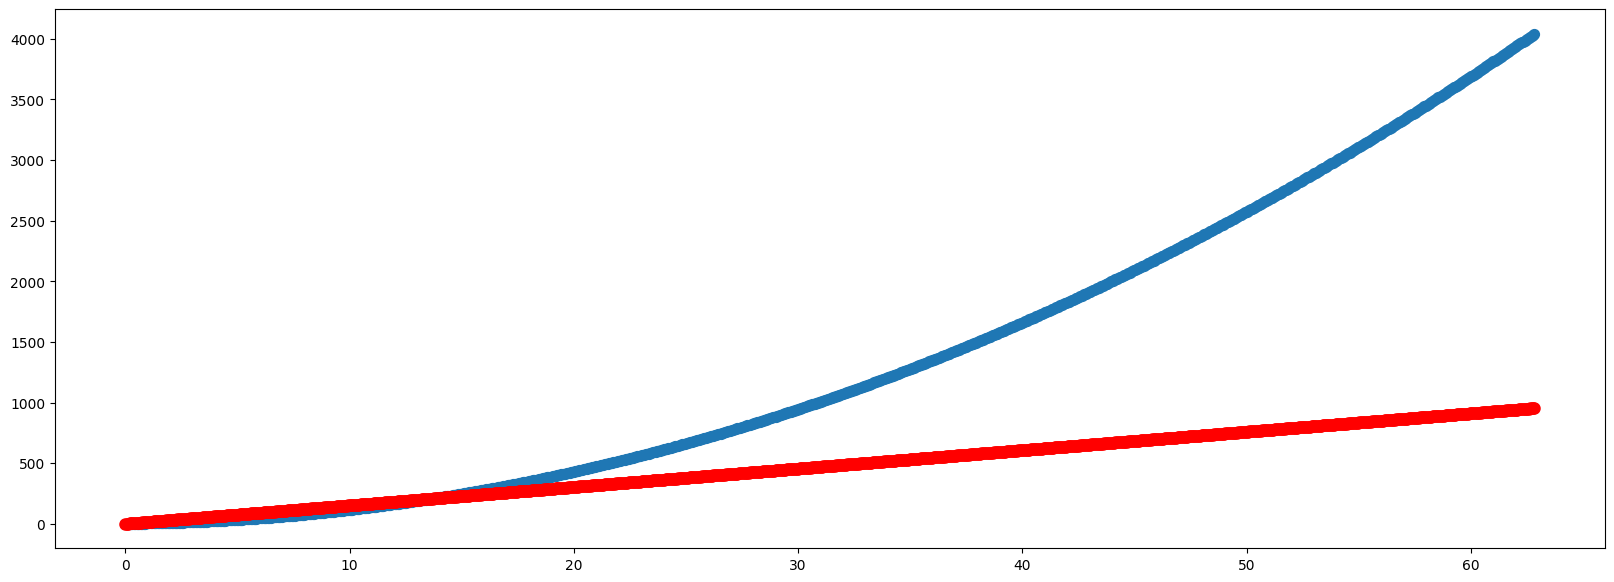

In [132]:
plt.figure(figsize=(20, 7))

plt.scatter(X_norm[:,0],y_norm,s=50)
plt.scatter(X_norm[:,0],model.predict(X_norm), lw=3, c='red')
plt.show()